**Put any package imports you need in the below space**

In [218]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from scipy import linalg as la
from sklearn.cluster import KMeans

**Exercise 1**: Generating the data set. Generate a total of 60 points whose (x,y)-coordinates are drawn from a mixture of three Gaussians in a 2-dimentional real space. Each mixture has a mean of 2, 4, and 6, respectively, a standard deviation of one, and about 20 points.

1. Plot all the points in a single 2-dimensional space by using different shapes for each mixture.

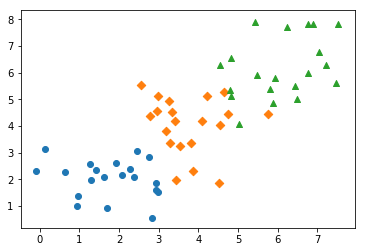

In [150]:
def gauss_gen(mean, std):
    mixture = []
    for i in range(20):
        x = np.random.normal(mean, std)
        y = np.random.normal(mean, std)
        mixture.append((x,y))
    return mixture
def plt_scatter(mixture, shape):
    x = [ i[0] for i in mixture]
    y = [ i[1] for i in mixture]
    plt.scatter(x, y, marker=shape)
m2 = gauss_gen(2,1)
m4 = gauss_gen(4,1)
m6 = gauss_gen(6,1)
plt_scatter(m2,'o')
plt_scatter(m4,'D')
plt_scatter(m6,'^')
plt.show()

2. Plot a histogram of all the points.

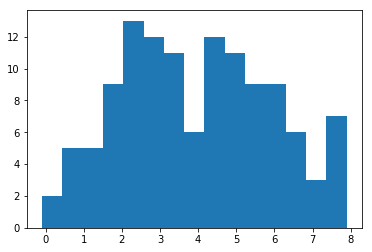

In [151]:
points = [ i[0] for i in m2 ] + [ i[1] for i in m2 ] \
        + [ i[0] for i in m4 ] + [ i[1] for i in m4 ] \
        + [ i[0] for i in m6 ] + [ i[1] for i in m6 ] 
plt.hist(points, bins=15)
plt.show()

**Exercise 2**: Generating the similarity graphs. Write a script that generates the following similarity graphs for the data set in Exercise 1 (see Lecture Notes):

1. KNN: The K-nearest neighbor graph using the value of K=10. Plot the graph.


Text(0.5, 1.0, 'K-Nearest Neighbor Graph')

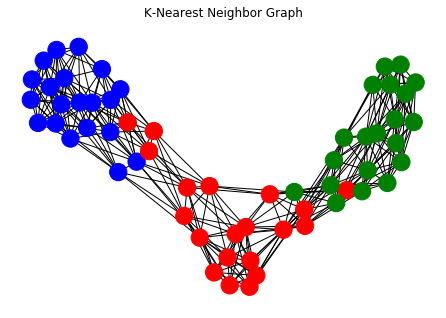

In [205]:
cors = m2 + m4 + m6
A = kneighbors_graph(cors, 10)
knn_adj = A.toarray()
color = ['blue' for i in range(20)] + ['red' for i in range(20)] + ['green' for i in range(20)]
knn_g = nx.from_numpy_matrix(knn_adj) 
nx.draw(knn_g, node_color = color)
plt.title("K-Nearest Neighbor Graph")

2. GK: The complete similarity graph using the Gaussian kernel with sigma=1 as similarity function. Plot the graph.

Text(0.5, 1.0, 'Gaussian kernel Similarity Graph')

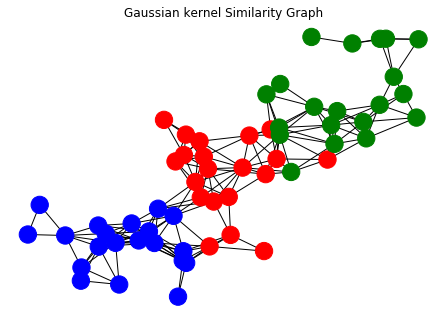

In [298]:
def gk_sim(n1, n2, sigma=1):
    dist = np.linalg.norm(np.asarray(n1)-np.asarray(n2))
    return np.exp(-dist**2/(2.*(sigma**2.)))
    
threshold = 0.5    
gks_matrix = np.zeros((60, 60))
for i in range(60):
    for j in range(60):
        if gk_sim(cors[i],cors[j]) > threshold:
            gks_matrix[i][j] = 1
gk_g = nx.from_numpy_matrix(gks_matrix) 
nx.draw(gk_g,cors, node_color = color)
plt.title("Gaussian kernel Similarity Graph")

**Exercise 3**: Characterizing the graph spectra. Write a script that generates the graph Laplacian matrix L = D - A and the normalized graph Laplacian matrix $\hat{L} = I - \hat{A}$ and calculates the graph spectra for each of the graphs in Exercise 2.

Plot each graph's eigenspectra as a separate figure with i as x-axis and $\lambda_i$ as y-axis (four lines).


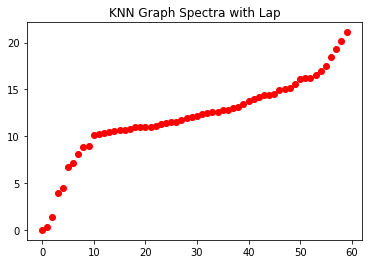

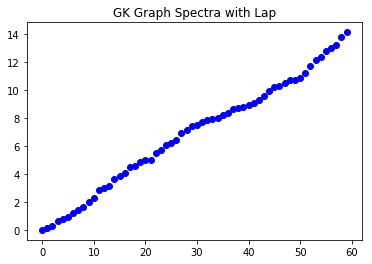

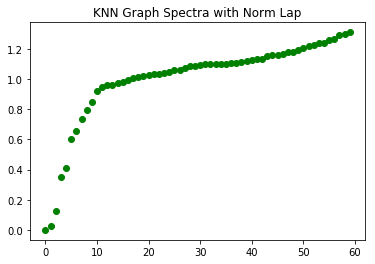

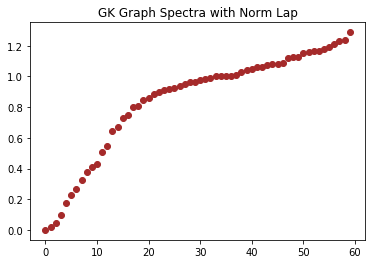

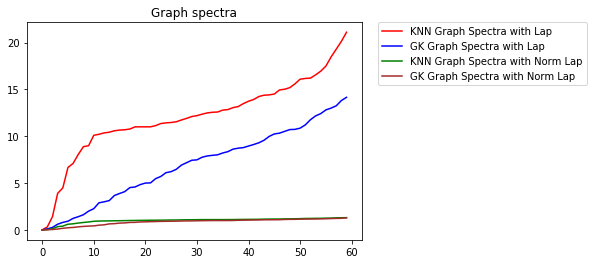

In [215]:
# Laplacian
knn_lap = nx.laplacian_matrix(knn_g)
knn_lap_norm = nx.normalized_laplacian_matrix(knn_g)
gk_lap = nx.laplacian_matrix(gk_g)
gk_lap_norm = nx.normalized_laplacian_matrix(gk_g)

# spectra
knn_spec = nx.laplacian_spectrum(knn_g)
gk_spec = nx.laplacian_spectrum(gk_g)
knn_spec_eign = np.linalg.eigvals(knn_lap_norm.todense())
gk_spec_eign = np.linalg.eigvals(gk_lap_norm.todense())

def plot_eig_spec(graph,color, title):
    plt.plot(sorted(graph), "o",color=color)
    plt.title(title)
    plt.show()

plot_eig_spec(knn_spec,"red","KNN Graph Spectra with Lap")
plot_eig_spec(gk_spec,"blue","GK Graph Spectra with Lap")
plot_eig_spec(knn_spec_eign,"green","KNN Graph Spectra with Norm Lap")
plot_eig_spec(gk_spec_eign,"brown","GK Graph Spectra with Norm Lap")

fig = plt.figure()
fig = fig.add_subplot(111)
plt.title("Graph spectra")
fig.plot(sorted(knn_spec),color="red", label='KNN Graph Spectra with Lap')
fig.plot(sorted(gk_spec),color="blue" , label='GK Graph Spectra with Lap')
fig.plot(sorted(knn_spec_eign),color="green",  label='KNN Graph Spectra with Norm Lap')
fig.plot(sorted(gk_spec_eign),color="brown",  label='GK Graph Spectra with Norm Lap')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

*What do you observe about the multiplicity of the "close to" zero eigenvalues? Are your observations consistent with the Properties described in lecture notes?*

Answer:
The "close to" zero eigenvalues means that the graph is "close to" being disconnected The observations from the above graphs are consistent with the lecture notes. We have approximately 3 points "close to" zero eigenvalues which is the expected behavior as we generated 3 communities of random points.

Plot each graph's eigenvector plot for the eigenvector u corresponding to the second smallest eigenvalue, with i as x-axis and u_i vector component as y-axis.

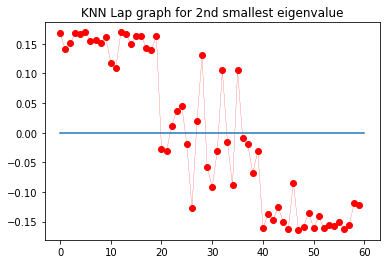

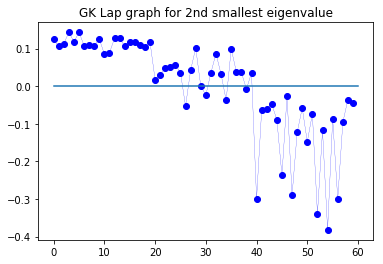

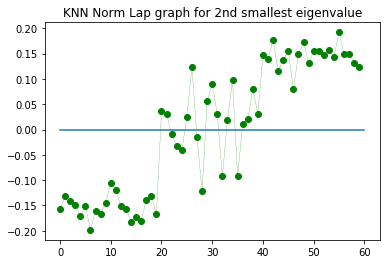

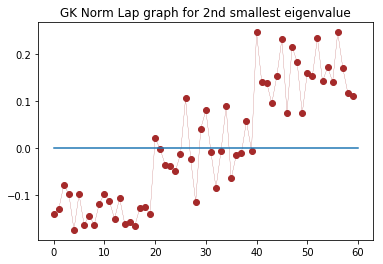

In [300]:
def second_eign(matrix, color, title):
    eign, evec  = la.eig(matrix)
    index = [ i[0] for i in sorted(enumerate(eign), key=lambda x:x[1]) ][1]
    vector = np.real(evec[:,index])
    plt.plot(vector, marker="o", color=color, linewidth=0.2)
    plt.plot((0,60), (0,0))
    plt.title(title)
    plt.show()

second_eign(knn_lap.todense(), "red", "KNN Lap graph for 2nd smallest eigenvetor")
second_eign(gk_lap.todense(), "blue", "GK Lap graph for 2nd smallest eigenvector")
second_eign(knn_lap_norm.todense(), "green", "KNN Norm Lap graph for 2nd smallest eigenvector")
second_eign(gk_lap_norm.todense(), "brown", "GK Norm Lap graph for 2nd smallest eigenvector")

*If you were using this plot for 2-way graph partitioning into S and V-S, the points from which mixtures will end up in which partition?*

Answer: If we assume the threshold is 0, the the first 20 points(mean=2) and some of second 20 points(mean=4) would be in one partition, and the last 20 points(mean=6) and some of second 20 points(mean=4) would be in the other parition. 

Calculate the conductance (write the script) for each of the identified partitions, S and V-S for the KNN graph using both the normalized and unnormalized Laplacian. Also, calculate the lower and upper bounds for the graph conductance using the inequalities provided in the lecture notes. Print the results of these calculations (make sure to label them).

In [309]:
def conductance(matrix):
    eign, evec  = la.eig(matrix)
    index = [ i[0] for i in sorted(enumerate(eign), key=lambda x:x[1]) ][1]
    value = np.real(eign[index])
    vector = np.real(evec[:,index])
    part1 = list(np.nonzero(vector > 0)[0])
    part2 = list(np.nonzero(vector <= 0)[0])
    lower = value / 2
    upper = np.sqrt(2*value)
    
    edges = nx.edges(knn_g, part1)
    out = len(edges)
    for edge in edges:
        #Decrease count if the edge is internal
        if edge[0] in part1 and edge[1] in part1:
            out -= 1
    con = out/len(edges)
    print (f'Conductance for first partition: {con}')
    edges = nx.edges(knn_g, part2)
    out = len(edges)
    for edge in edges:
        #Decrease count if the edge is internal
        if edge[0] in part2 and edge[1] in part2:
            out -= 1
    con = out/len(edges)
    print (f'Conductance for second partition: {con}')
    print(f'Lower bound: {lower}' )
    print(f'Upper bound: {upper}' )

print("KNN graph with unnormalized Lap")
conductance(knn_lap.todense())
print("KNN graph with normalized Lap")
conductance(knn_lap_norm.todense())


KNN graph with unnormalized Lap
Conductance for first partition: 0.12429378531073447
Conductance for second partition: 0.10679611650485436
Lower bound: 0.1618127543919575
Upper bound: 0.8045191219404484
KNN graph with normalized Lap
Conductance for first partition: 0.10679611650485436
Conductance for second partition: 0.12429378531073447
Lower bound: 0.013314268821369437
Upper bound: 0.23077494509906776


**Exercise 4**: Spectral graph clustering. Write a script that performs spectral graph clustering using the normalized graph Laplacian of each of the graph in Exercise 2. The pseudo-code of the clustering method is described in the lecture notes. For the k-means clustering method use the value of k=3. Run the spectral graph clustering and plot the corresponding points in Ex.1 with the shapes based on the identified cluster (one plot for each graph). In addition, run the k-means clustering algorithm on the data set in Exercise 1, using the Euclidean distance as the dissimilarity metric, and the value of k=3. Plot these results in 2-dimensional space but use different shape for each of the identified cluster. You should have three plots: two for each graph using spectral clustering, and one for k-means on the original data.

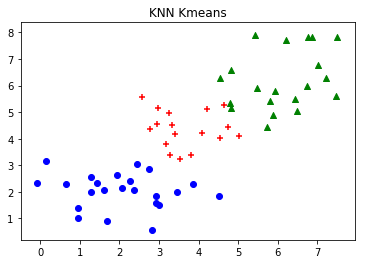

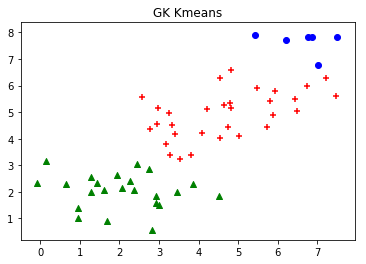

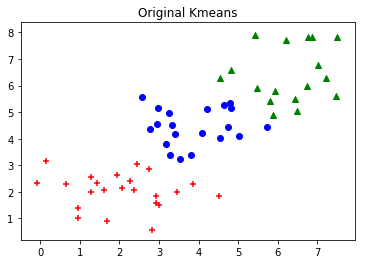

In [247]:
def spec_kmeans(matrix, k=3):
    vals, vecs = np.linalg.eig(matrix)
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vecs[:,1:4])
    return kmeans.labels_

def reg_kmeans(cors, k=3):
    matrix = np.array(cors)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(matrix)
    return kmeans.labels_
    
knn_kmeans_label = spec_kmeans(knn_lap_norm.todense())
gk_kmeans_label = spec_kmeans(gk_lap_norm.todense())
origin_kmeans_label = reg_kmeans(cors)

colors = ["r", "g", "b"]
markers = ["+", "^", "o"]
labels = ["KNN Kmeans", "GK Kmeans", "Original Kmeans"]
clusters = [knn_kmeans_label, gk_kmeans_label, origin_kmeans_label]
for l,c in zip(labels, clusters):
    for i,p in enumerate(cors):
        plt.scatter(p[0], p[1], c=colors[c[i]], marker=markers[c[i]])
    plt.title(l)
    plt.show()